<a href="https://colab.research.google.com/github/MaiAbuJasser/deep-learning_for_vision_systems/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
import cv2

In [ ]:
def mygenerator():
    print('First item')
    yield 10

    print('Second item')
    yield 20

    print('Last item')
    yield 30

In [ ]:
test_mygenerator = mygenerator()
this_is_10 = next(test_mygenerator)
print(this_is_10)
for i in test_mygenerator:
    print("i value = "+str(i))

First item
10
Second item
i value = 20
Last item
i value = 30


In [ ]:
def sliding_window(image, step, ws):
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [ ]:
def image_pyramid(image, scale=1.5, minSize=(224, 224)):
    yield image
    while True:
        w = int(image.shape[1] / scale)
        h = int(image.shape[0] / scale)
        image = cv2.resize(image, (w, h))
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        yield image

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
import imutils as im

In [ ]:
WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 16
ROI_SIZE = (200, 150)
INPUT_SIZE = (224, 224)
MIN_CONF = 0.9

In [ ]:
model = ResNet50(weights="imagenet", include_top=True)
orig = cv2.imread("cat.jpg")
orig = im.resize(orig, width=WIDTH)
(H, W) = orig.shape[:2]

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)
rois = []
locs = []
for image in pyramid:
    scale = W / float(image.shape[1])
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi = preprocess_input(roi)
        rois.append(roi)
        locs.append((x, y, x + w, y + h))

In [ ]:
rois = np.array(rois, dtype="float32")
preds = model.predict(rois)
preds = imagenet_utils.decode_predictions(preds, top=1)
labels = {}
for (i, p) in enumerate(preds):
    (imagenetID, label, prob) = p[0]
    if prob >= MIN_CONF:
        box = locs[i]
        L = labels.get(label, [])
        L.append((box, prob))
        labels[label] = L

35363/35363 [==============================] - 0s 0us/step


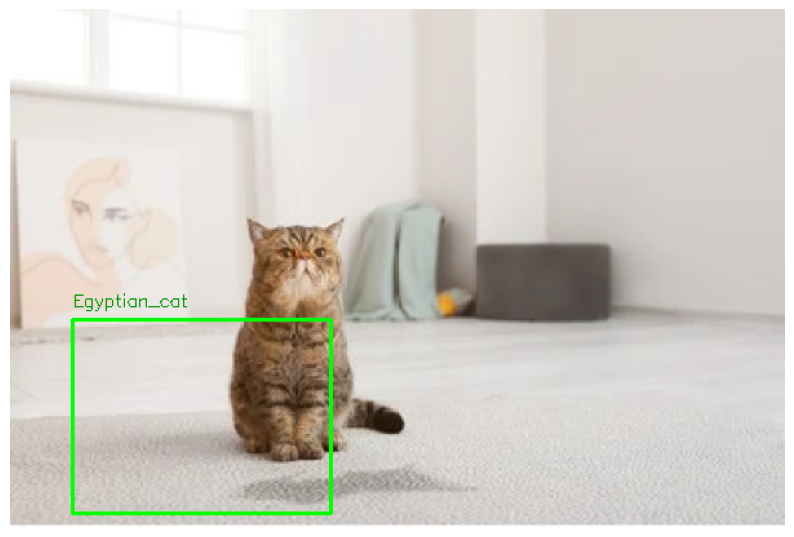

In [ ]:
from imutils.object_detection import non_max_suppression
clone = cv2.cvtColor(orig.copy(), cv2.COLOR_BGR2RGB)

for label in labels.keys():
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
    for (startX, startY, endX, endY) in boxes:
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(clone, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 150, 0), 0)
plt.figure(figsize=(10,10))
plt.imshow(clone)
plt.axis("off")
plt.show()

 #My turn

17/17 [==============================] - 3s 140ms/step


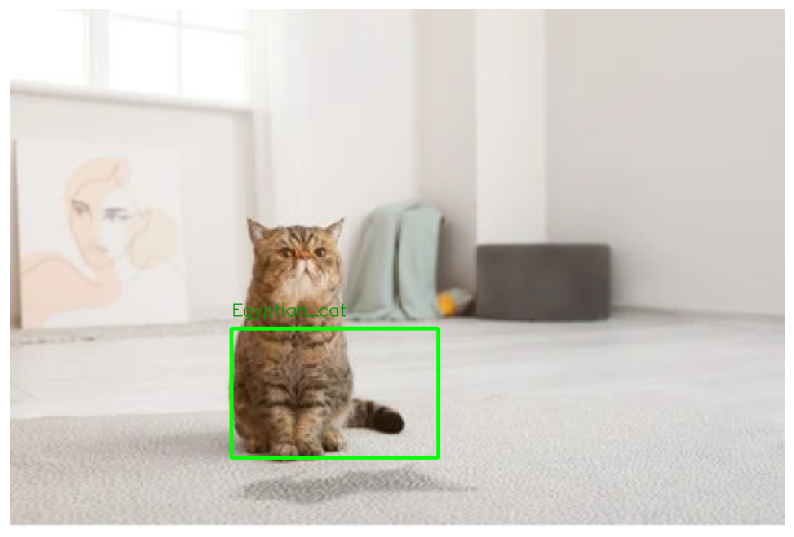

In [ ]:
WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 19
ROI_SIZE = (160, 100)
INPUT_SIZE = (224, 224)
MIN_CONF = 0.9
model = ResNet50(weights="imagenet", include_top=True)
orig = cv2.imread("cat.jpg")
orig = im.resize(orig, width=WIDTH)
(H, W) = orig.shape[:2]
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)
rois = []
locs = []
for image in pyramid:
    scale = W / float(image.shape[1])
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi = preprocess_input(roi)
        rois.append(roi)
        locs.append((x, y, x + w, y + h))
rois = np.array(rois, dtype="float32")
preds = model.predict(rois)
preds = imagenet_utils.decode_predictions(preds, top=1)
labels = {}
for (i, p) in enumerate(preds):
    (imagenetID, label, prob) = p[0]
    if prob >= MIN_CONF:
        box = locs[i]
        L = labels.get(label, [])
        L.append((box, prob))
        labels[label] = L
from imutils.object_detection import non_max_suppression
clone = cv2.cvtColor(orig.copy(), cv2.COLOR_BGR2RGB)

for label in labels.keys():
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
    for (startX, startY, endX, endY) in boxes:
        cv2.rectangle(clone, (startX, startY), (endX, endY),
            (0, 255, 0), 2)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(clone, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 150, 0), 0)
plt.figure(figsize=(10,10))
plt.imshow(clone)
plt.axis("off")
plt.show()


15/15 [==============================] - 2s 87ms/step


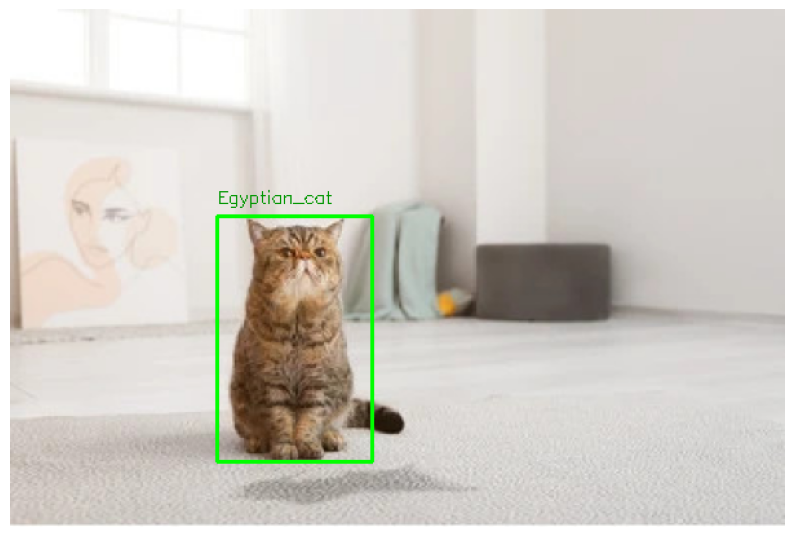

In [ ]:
WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 20 # as this value is smaller it is considered to lose details but when i increased it i got better results (because
#the cat body is so identical in many regions so i do not care too much about these details and i do not want to repeat capturing these 
 # features so larger size is suitable in this case)
ROI_SIZE = (120, 130) # i decreased  the RIO size to capture more detailed features
INPUT_SIZE = (224, 224)
MIN_CONF = 0.9
model = ResNet50(weights="imagenet", include_top=True)
orig = cv2.imread("cat.jpg")
orig = im.resize(orig, width=WIDTH)
(H, W) = orig.shape[:2]
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)
rois = []
locs = []
for image in pyramid:
    scale = W / float(image.shape[1])
    for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
        x = int(x * scale)
        y = int(y * scale)
        w = int(ROI_SIZE[0] * scale)
        h = int(ROI_SIZE[1] * scale)
        roi = cv2.resize(roiOrig, INPUT_SIZE)
        roi = img_to_array(roi)
        roi = preprocess_input(roi)
        rois.append(roi)
        locs.append((x, y, x + w, y + h))
rois = np.array(rois, dtype="float32")
preds = model.predict(rois)
preds = imagenet_utils.decode_predictions(preds, top=1)
labels = {}
for (i, p) in enumerate(preds):
    (imagenetID, label, prob) = p[0]
    if prob >= MIN_CONF:
        box = locs[i]
        L = labels.get(label, [])
        L.append((box, prob))
        labels[label] = L
from imutils.object_detection import non_max_suppression
clone = cv2.cvtColor(orig.copy(), cv2.COLOR_BGR2RGB)

for label in labels.keys():
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)
for (startX, startY, endX, endY) in boxes:
    adjusted_startY = max(startY - 60, 0)  # before updating this part i was facing the problem of i want to capture more from the
    #above section by doing this i subtract 60 from each pixel just for the (y dimension) as it is the axis of the height
    # to capture more from the above part, if the pixel is already from the above section startY-60 will be negative so 0 will
    # be taken as it is the  max
    # i found that 60 is the best by trial and error
    cv2.rectangle(clone, (startX, adjusted_startY), (endX, endY),
        (0, 255, 0), 2)
    y = adjusted_startY - 10 if adjusted_startY - 10 > 10 else adjusted_startY + 10
    cv2.putText(clone, label, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 150, 0), 0)

plt.figure(figsize=(10,10))
plt.imshow(clone)
plt.axis("off")
plt.show()
